In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split


# 문제에 대한 정보
problem = pd.read_csv('tag_key.csv')

In [118]:
problem.shape

(5598, 195)

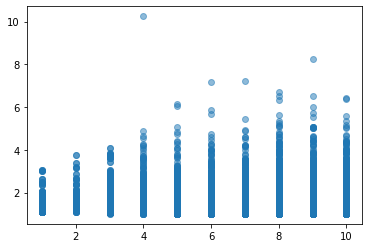

In [119]:
x = problem['level']
y = problem['averageTries']
plt.scatter(x,y, alpha = 0.5)

In [120]:
problem

,problemId,level,averageTries,math,implementation,dp,graphs,data_structures,string,greedy,...,top_tree,chordal_graph,majority_vote,a_star,rb_tree,birthday,degree_sequence,discrete_kth_root,multipoint_evaluation,differential_cryptanalysis
0,1000,1,2.3692,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1001,1,1.3977,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1271,1,3.0061,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1550,1,1.5381,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2338,1,1.9530,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5593,21837,10,2.7500,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
5594,21855,10,1.2500,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5595,21917,10,1.1429,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5596,21937,10,2.1160,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [121]:
for i in range(len(problem)):
    problem['level'][i] += problem['averageTries'][i]/10

/var/folders/3v/z83phb8n2dv8c7trsg991wpm0000gn/T/ipykernel_40807/365920599.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  problem['level'][i] += problem['averageTries'][i]/10


In [122]:
print(problem['level'][0])

1.23692


In [123]:
problem = problem.drop('averageTries', axis=1)

In [124]:
# 사용할 Column
# problemid, level, averageTries, tag-key
# 데이터 전처리
problem = problem.iloc[:,1:]
problem.head()

,level,math,implementation,dp,graphs,data_structures,string,greedy,bruteforcing,graph_traversal,...,top_tree,chordal_graph,majority_vote,a_star,rb_tree,birthday,degree_sequence,discrete_kth_root,multipoint_evaluation,differential_cryptanalysis
0,1.23692,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.13977,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.30061,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.15381,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1.19530,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [125]:
# 데이터 중복행 삭제
problem = problem.drop_duplicates()
problem.head()
problem_no = problem.iloc[:,1:]

In [126]:
problem_no.head()

,math,implementation,dp,graphs,data_structures,string,greedy,bruteforcing,graph_traversal,sorting,...,top_tree,chordal_graph,majority_vote,a_star,rb_tree,birthday,degree_sequence,discrete_kth_root,multipoint_evaluation,differential_cryptanalysis
0,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [137]:
k = 100
model = KMeans(n_clusters=k, random_state=10)
model.fit(problem_no)

KMeans(n_clusters=100, random_state=10)

In [138]:
problem['cluster'] = model.fit_predict(problem_no)

In [139]:
problem.tail()

,level,math,implementation,dp,graphs,data_structures,string,greedy,bruteforcing,graph_traversal,...,chordal_graph,majority_vote,a_star,rb_tree,birthday,degree_sequence,discrete_kth_root,multipoint_evaluation,differential_cryptanalysis,cluster
5593,10.27500,0,0,0,1,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,59
5594,10.12500,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,26
5595,10.11429,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,9
5596,10.21160,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,67
5597,10.11250,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,25


In [140]:
problem['cluster']

0        7
1        7
2       78
3       11
4       78
        ..
5593    59
5594    26
5595     9
5596    67
5597    25
Name: cluster, Length: 4788, dtype: int32

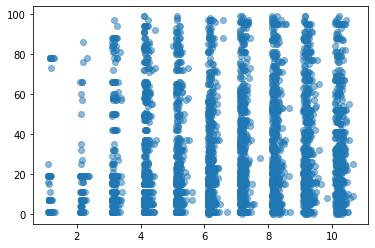

In [141]:
x = problem['level']
y = problem['cluster']
plt.scatter(x,y, alpha = 0.5)

In [132]:
classifier = KNeighborsClassifier(n_neighbors = 5)
X = problem_no
Y = problem['cluster']

In [133]:
trainX, testX, trainy, testy = train_test_split(X,Y,test_size = 0.01, random_state =1)

In [134]:
classifier.fit(trainX,trainy)

KNeighborsClassifier()

In [135]:
pred_y = classifier.predict(testX)

In [136]:
print(pred_y)

[ 8 21  4 18  1  1 29  1  7  5  2  2  6 12  1  1  1  2  2 12 17 21  2 15
  7 12  1 18  5 19 26 10 21  1 19 23  2 10 10  2  5 28 17 10 19  7  2 10]
